<a href="https://colab.research.google.com/github/MWH997/AdvancedML-NeuropsychiatricDisorder-SchizophreniaCaseStudy/blob/master/Advanced_Machine_Learning_Approaches_in_Neuropsychiatric_Disorder_Analysis_A_Synthetic_Case_Study_on_Schizophrenia_like_Illness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# Advanced Machine Learning Approaches in Neuropsychiatric Disorder Analysis: A Synthetic Case Study on Schizophrenia-like Illness


## Md Wahid Hassan


</center>


<center>

# Report

<center>

## Introduction


<left><p style="text-align:justify;">In this project, the task is to predict the diagnosis of a "schizophrenia-like illness" based on the information contained in the "MS4S16_Dataset.csv" file. The data contains 5000 rows and 27 columns, including both numerical and categorical features. The target variable "Diagnosis" is binary, where a value of 1 indicates the presence of the illness, and a value of 0 indicates the absence. Before building the models, the data will undergo cleaning and missing value imputation. Additionally, feature selection using SelectKBest with the f_classif scoring method will be performed, and Principal Component Analysis (PCA) will be applied to reduce the dimensionality of the feature space.
To predict the diagnosis, Logistic Regression with both L1 and L2 regularization, as well as Random Forest Classifier, will be applied. The performance of these models will be compared and evaluated.
</p></left>

## Methodology

<p>This project is based on a simple methodology which involves several steps to preprocess and analyze the given dataset. The steps are as follows:</p><ol><li><p><strong>Dataset Exploration:</strong> The dataset is first explored using the methods available in the pandas and missingno libraries to gain an overview of the dataset. This includes getting information about the columns and missing values in the dataset.</p></li><li><p><strong>Data Cleaning and Encoding:</strong> The dataset is then cleaned and missing values are filled in. Encoding is applied to the dataset using both Label Encoding and Dummy Variable Encoding. A correlation matrix is generated to understand the relationships between columns.</p></li><li><p><strong>Train-Test Split:</strong> The cleaned and encoded data is then split into train and test sets.</p></li><li><p><strong>Machine Learning Modeling:</strong> The project is then divided into four parts, each involving the application of machine learning algorithms to the preprocessed data. The four parts are described below:
a. Raw data fed into a batch of machine learning algorithms with cross-validation, and performance metrics are calculated. This serves as the baseline comparison for all other results.
b. The preprocessed data from part a is put through the unsupervised learning method PCA and transformed into components derived from PCA.
c. A feature selection algorithm is applied to reduce the features based on their importance, and all steps from part a are repeated.
d. PCA is applied to find the components of the reduced features from part c.</p></li><li><p><strong>Results Analysis and Summary:</strong> The results of the machine learning models are analyzed and a summary is provided.</p></li></ol>

## Exploratory Data Analysis

### Analysis

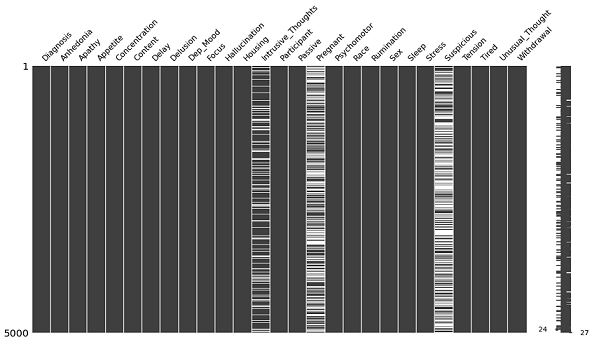

The data is stored in a pandas DataFrame, with 5000 rows and 27 columns. Each column represents a feature, with the following non-null counts and data types:

- Diagnosis (int64): 5000 non-null
- Anhedonia (float64): 5000 non-null
- Apathy (float64): 5000 non-null
- Appetite (float64): 5000 non-null
- Concentration (float64): 5000 non-null
- Content (float64): 5000 non-null
- Delay (object): 5000 non-null
- Delusion (float64): 5000 non-null
- Dep_Mood (float64): 5000 non-null
- Focus (float64): 5000 non-null
- Hallucination (float64): 5000 non-null
- Housing (object): 5000 non-null
- Intrusive_Thoughts (float64): 4170 non-null
- Participant (int64): 5000 non-null
- Passive (float64): 5000 non-null
- Pregnant (float64): 2762 non-null
- Psychomotor (float64): 5000 non-null
- Race (object): 5000 non-null
- Rumination (float64): 5000 non-null
- Sex (object): 5000 non-null
- Sleep (float64): 5000 non-null
- Stress (float64): 5000 non-null
- Suspicious (float64): 2127 non-null
- Tension (float64): 5000 non-null
- Tired (float64): 5000 non-null
- Unusual_Thought (float64): 5000 non-null
- Withdrawal (float64): 5000 non-null

Thus can infer that the dataset contains null values from the output of the df.info method, and I can infer that the column's inf values are present from the output of the df.describe method. Another distinctive feature of this dataset is that every Pregnant column value that corresponds to a Sex value that is Male is null. This needs to be fixed.

### Handling Missing Values

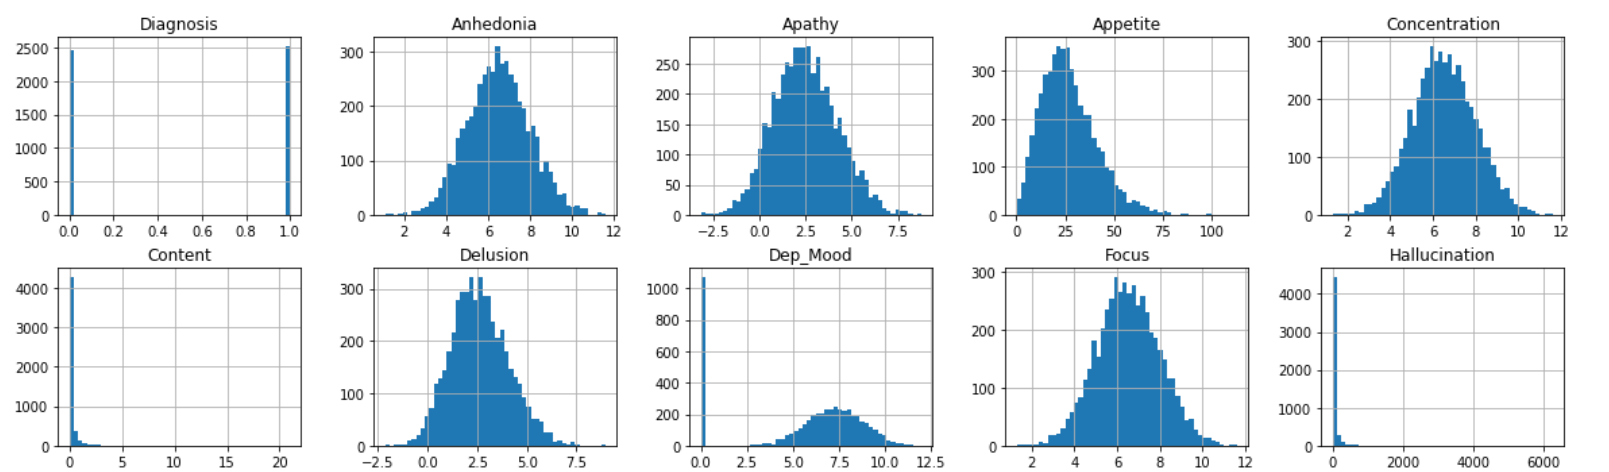

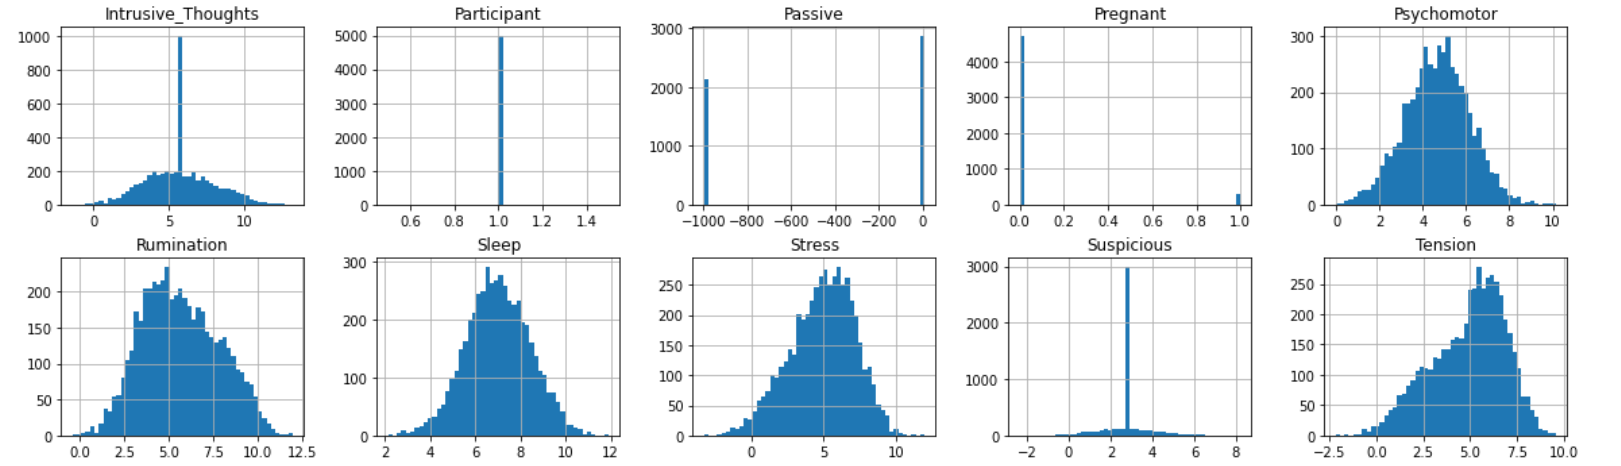

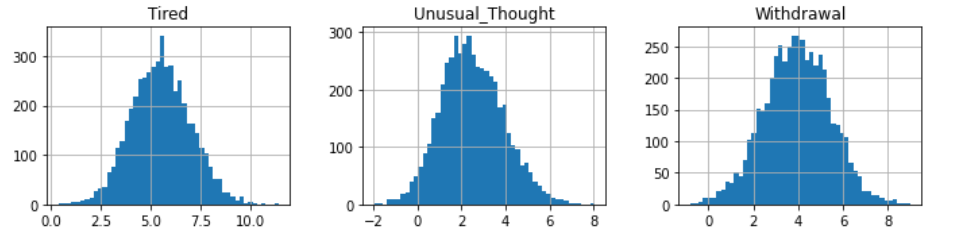

From the histogram it can be deduced that a lot of the columns are normally distributed.

So after careful examination of the dataset and the histograms generated for each of the column. Here are the following steps taken to resolve the issues of the dataset.

1. The `Pregnant` column's null values are replaced with 0 based on the fact that biological males can never get pregnant.
2. The inf values in `Tired` are replaced with mean of the column based on the skewness value of the column.
3. The null values of `Intrusive_Thoughts` column is replaced with mean of the column based on the skewness value of the column.
4. The null values of `Suspicious` column is replaced with mean of the column based on the skewness value of the column.

### Encoding

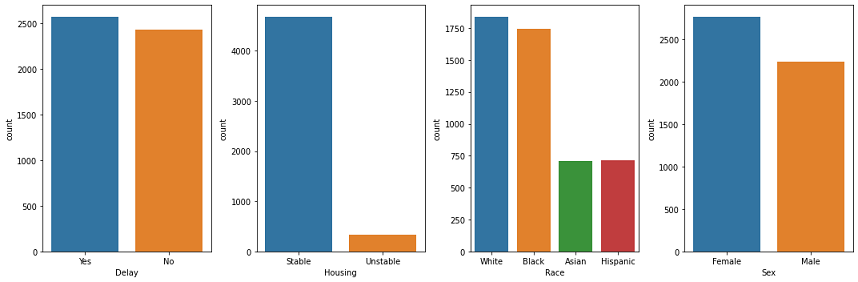

According to the above graphic, the columns "Delay," "Housing," and "Sex" can all be handled using "LabelEncoder," but the column "Race" requires the "Dummy Variables Encoding" found in the "pandas.get dummies" method. 'drop first' was set to 'True' in the pandas function to prevent multi-colinearity.

### Dropping Columns

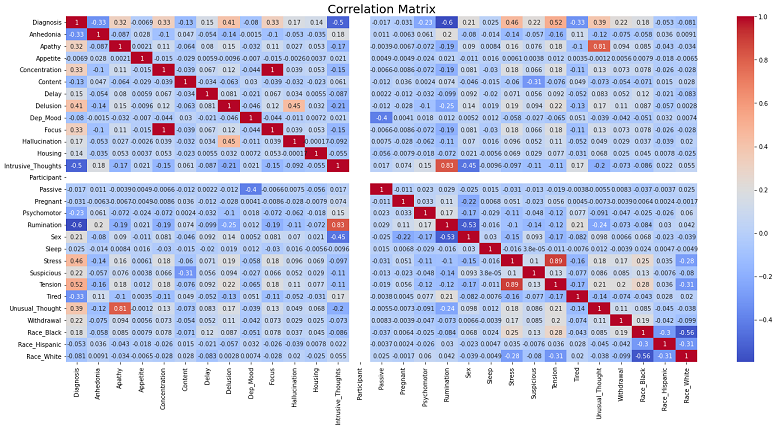

When looking at the correlation matrix's values, it was clear that the "Participant" column was off, and following deeper analysis, it was found that this column only had values of 1. This was removed from the dataframe because it would do absolutely nothing for the machine learning models. Apathy and Unusual Thought, for example, have a correlation of 0.81 between them. Some columns have also showed a substantial positive association with one another. However, it was decided to leave those columns in place because "PCA" can handle the multi-colinearity.

### Outliers


There were some outliers in some of the columns, but those weren't eliminated out of fear that doing so might lead the data to lose some of its information. While removing outliers can reduce some noise in the dataset, it was not pursued since it might have added bias to the dataset due to the sample's small size. Additionally, because of the synthetic nature of the dataset and the absence of subject-matter expertise, it is advisable to leave the outliers as they are because they tend to be subjectively based on specific statistical thresholds.

### Feature Selection

Using the supplied label, the 'feature selector' method selects features from the input dataframe (df) (label). The 'top 10 features' with the highest 'F-test' scores are chosen using the 'f classif' method of the 'SelectKBest' class from'scikit-learn'. The chosen features and their scores are shown as a bar graph in a dataframe. The train and test datasets are then returned after the data has been separated into train and test datasets using only the chosen features.

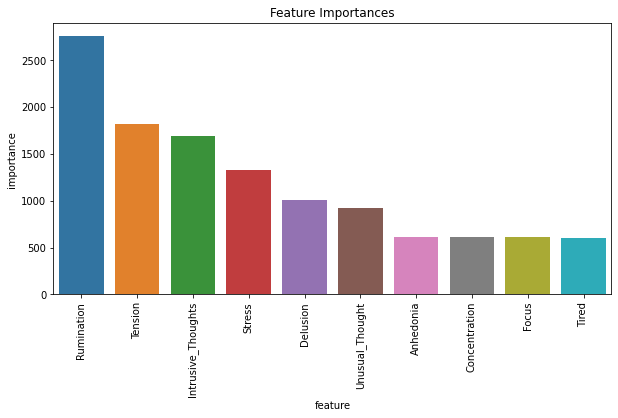

As per code written, the selector gave me ten features to work with.

## Unsupervised Learning

On the input data designated as "X train" and "X test," I used principal component analysis (PCA) to do unsupervised learning. The option 'n' can be used to specify the number of components utilised in the PCA model (defaults to None, meaning all components are used). I plotted the "explained variance ratio" and saved it in a dataframe to better understand how each component contributed to the overall result. I then use the trained model to transform the 'X train' and 'X test' data after fitting the PCA model to the 'X train' data. The altered X train and X test data are what I finally return.

### PCA on Dataset After Encoding

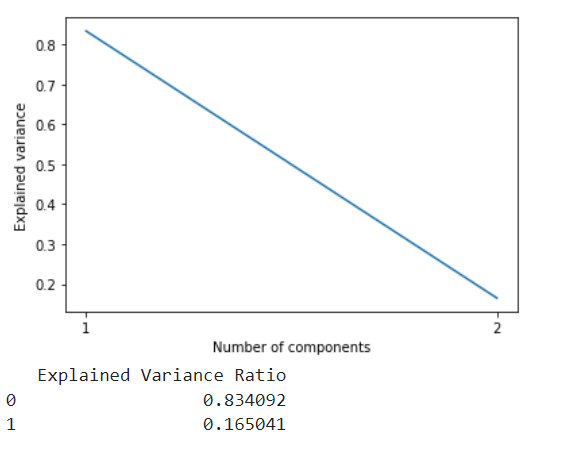

When using `PCA` was run on the preprocessed data and the `n_components` is set to `0.90`, which gives me `90%` variance from the data. The number of components that was obtained as only two of the components hold `90%` of the variance.

### PCA on Selected Features After Encoding

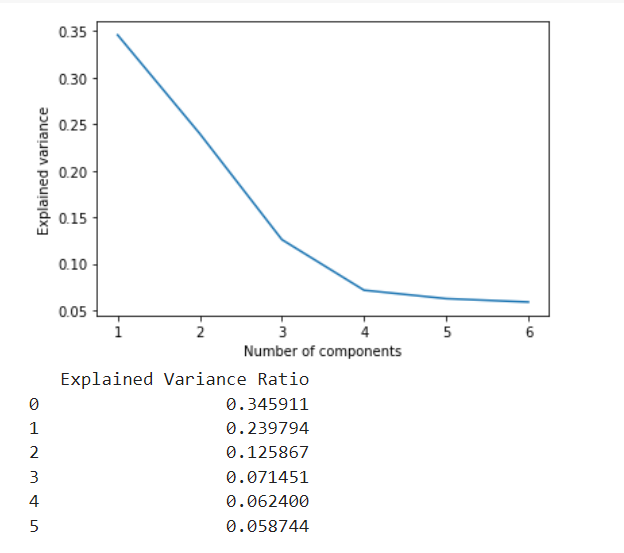

The results from this `PCA` is far more interesting as it can be seen that the number of components obtained are `six`. This tells me that by reducing dimensionality of the dataset by using the features from the selected features.

## Supervised Learning

### Explanation of `overfitting_underfitting` method

I created a function called "overfitting underfitting" that assesses how well a certain machine learning model is performing. The function accepts as inputs the model, training data, test data, the number of cross-validation folds, and the model name.

The function evaluates the model's performance on the test data using the "score" technique and performs cross-validation on the training data using the "cross val score" function. The mean of the cross-validation scores and the test score are then subtracted to determine the difference.

The function provides a message indicating whether the model is overfitting, underfitting, or fitting the data well based on the estimated difference. An if-else statement that compares the difference's value to predefined criteria creates the output message.

In conclusion, the "overfitting underfitting" function offers programmers a simple and effective way to assess a machine learning model's performance and decide if it is overfitting, underfitting, or accurately fitting the data.

### Explanation of `machine_learning` method

The method machine_learning is a function in a machine learning script that trains and evaluates the performance of three different models: `Logistic Regression` with `L1` and `L2` `regularization`, and `Random Forest Classifier`. The function takes four arguments: `X_train`, `y_train`, `X_test`, and `y_test`, which are the training and test datasets.

The function first fits the models to the training data, then predicts the probabilities for each model on the test data. After that, the function calculates the false positive rate and true positive rate for each model, then plots the Receiver Operating Characteristic (ROC) curve for each model and displays it. Finally, the function calls another function named `overfitting_underfitting` to evaluate the overfitting or underfitting of the models.

### Performance of the model on Preprocessed Data

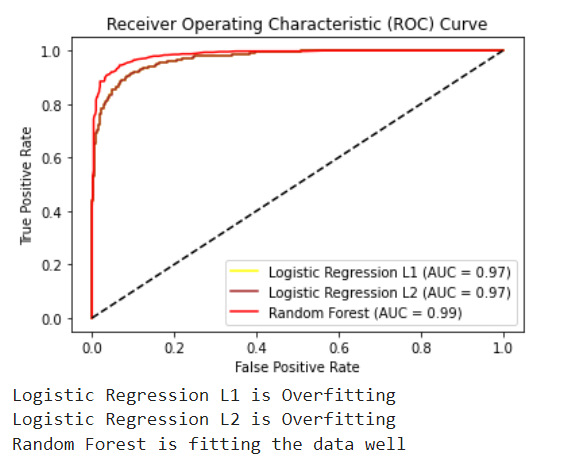

By analyzing the results of the models that were run on the preprocessed data, it can be said that although the values of `AUC` scores are high, both `L1` and `L2` versions of `Logistic Regression` is overfitting the dataset, this is determined by running the model through the method `overfitting_underfitting`. Also `Random Forest Classifier` was able to fit data well, which is good indicator that model is good for the dataset.

### Performance of the model with PCA

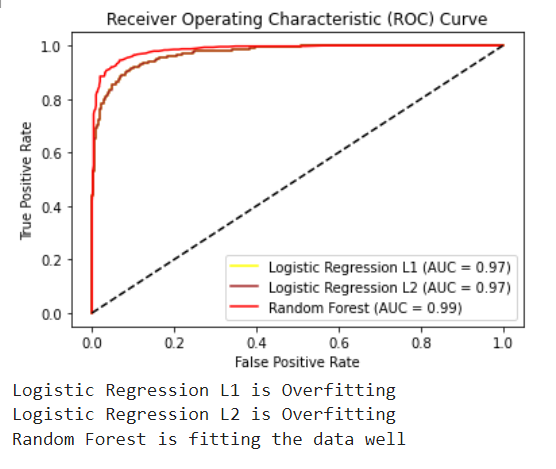

Even after performing `PCA`, regression was overfitting the dataset and the `random forest` performing in a similar way as before.

### Performance of the model on Preprocessed Feature Selected Data

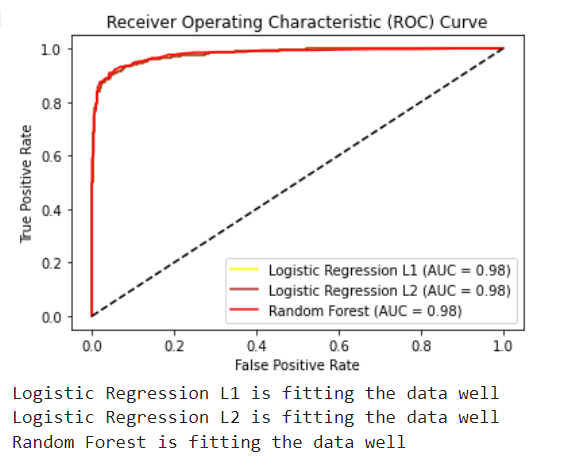

Everything changes as we start using the features selected by our feature selector method. The `AUC` value for both `Logistic Regression` model had an increase of `0.01` and the overfitting issues seems to be resolved. However, the `AUC` value for `Random Forest` decreases by `0.01`.

### Performance of the model on Feature Selected PCA

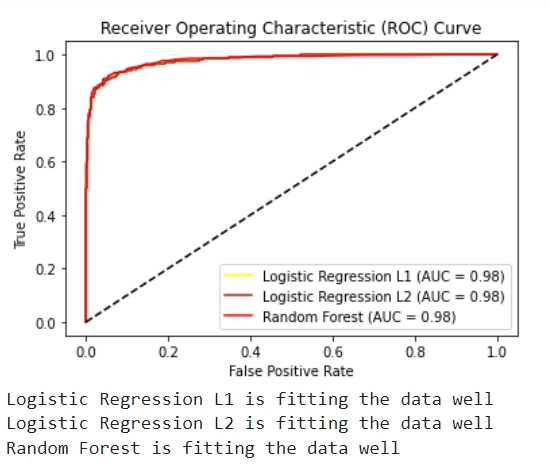

The results here are similar to the one above with nothing more to note.

The reason behind the decrease in `AUC` score of `Random Forest` can be because `Random Forest` is an ensemble method that uses a combination of many decision trees. When reducing the number of features, some of the information that the decision trees use to make predictions is lost. This can decrease the performance of the model, leading to a decrease in the AUC value.

On the other hand, `Logistic Regression` is a linear model that relies on a weighted sum of the features to make predictions. When reducing the number of features, the model can become simpler, which can lead to an increase in performance and an increase in the AUC value.

However it is important to note that the issue of `overfitting` was eliminated by using `feature selection` and the decrease in `AUC` is not that drastic. It's always a balance between `fitting` and `accuracy`.

## Conclusion

This research has opened my eyes to the world of "Applied Machine Learning." The dataset was artificial, but it featured a lot of fascinating features. From identifying the columns with empty values to handling "inf" values in the "Tired," to developing a dynamic solution to handle every missing value in the dataset. The project's dataset preprocessing component both tough and engaging at the same time. I gave dealing with the dataset's "outliers" or, more precisely, the choice to maintain them, a lot of thought. There was also a lot of thought put into the dynamic nature of encoding. Making the algorithms for supervised and unsupervised learning was very intriguing. Additionally, the models appeared to be accurate at first glance and would have been able to trick many individuals into believing that they fit; nevertheless, the truth only came to light once a function to check for "overfitting" and "underfitting" was developed.
Finally, using "feature selection" and "PCA," it was possible to obtain a batch of models that fit the dataset well.

## Future Work

Hyperparameter optimization and advanced neural networks can be utilised to train the dataset to produce the best results. Dimensionality reduction can be handled using sophisticated feature engineering tools like Recursive Feature Elimination.

## References

1. Kashnitsky, I. (n.d.). Topic 1 Exploratory Data Analysis with Pandas. [Kaggle Notebook]. Retrieved from https://www.kaggle.com/code/kashnitsky/topic-1-exploratory-data-analysis-with-pandas

2. Sklearn. (2021). train_test_split. [API Reference]. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

3. Stack Overflow. (2017). Using cross validation and AUC ROC for a Logistic Regression model in sklearn. [Discussion]. Retrieved from https://stackoverflow.com/questions/44036193/using-cross-validation-and-auc-roc-for-a-logistic-regression-model-in-sklearn

4. Pandas. (2021). pandas.get_dummies. [API Reference]. Retrieved from https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

5. Stack Overflow. (2017). Using cross validation and AUC ROC for a Logistic Regression model in sklearn. [Discussion]. Retrieved from https://stackoverflow.com/questions/44036193/using-cross-validation-and-auc-roc-for-a-logistic-regression-model-in-sklearn

6. Sklearn. (2021). LogisticRegression. [API Reference]. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

7. Aditya, P. (n.d.). L1 and L2 Regularization. [Medium Blog]. Retrieved from https://medium.com/@aditya97p/l1-and-l2-regularization-237438a9caa6

8. Sklearn. (2021). RandomForestClassifier. [API Reference]. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

9. Stack Exchange. (2015). How can we calculate ROC/AUC for classification algorithm such as random forest? [Discussion]. Retrieved from https://stats.stackexchange.com/questions/188616/how-can-we-calculate-roc-auc-for-classification-algorithm-such-as-random-forest

10. Datadriveninvestor. (n.d.). How to handle Overfitting and Underfitting. [Medium Blog]. Retrieved from https://medium.datadriveninvestor.com/how-to-handle-overfitting-and-underfitting-470a1f7389fe

11. Stack Overflow. (2019). Google Co-Laboratory Notebook PDF Download. [Discussion]. Retrieved from https://stackoverflow.com/questions/52588552/google-co-laboratory-notebook-pdf-download